## EXPLORATORY DATA ANALYSIS

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data from compiled.csv created by qtdata.ipynb
df = pd.read_csv('compiled.csv', index_col=0)

In [3]:
# Understand the data
print(df.info()) 
print(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1295
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1296 non-null   object 
 1   000660.KS       1296 non-null   float64
 2   005930.KS       1296 non-null   float64
 3   AMD             1296 non-null   float64
 4   AMZN            1296 non-null   float64
 5   ASML            1296 non-null   float64
 6   GOOG            1296 non-null   float64
 7   INTC            1296 non-null   float64
 8   MSFT            1296 non-null   float64
 9   MU              1296 non-null   float64
 10  NVDA            1296 non-null   float64
 11  TSM             1296 non-null   float64
 12  ^GSPC           1296 non-null   float64
 13  ^IXIC           1296 non-null   float64
 14  ^SOX            1296 non-null   float64
 15  000660.KS_chg   1295 non-null   float64
 16  005930.KS_chg   1295 non-null   float64
 17  AMD_chg         1295 non-null   float6

In [4]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Print to check
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1295
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1296 non-null   datetime64[ns]
 1   000660.KS       1296 non-null   float64       
 2   005930.KS       1296 non-null   float64       
 3   AMD             1296 non-null   float64       
 4   AMZN            1296 non-null   float64       
 5   ASML            1296 non-null   float64       
 6   GOOG            1296 non-null   float64       
 7   INTC            1296 non-null   float64       
 8   MSFT            1296 non-null   float64       
 9   MU              1296 non-null   float64       
 10  NVDA            1296 non-null   float64       
 11  TSM             1296 non-null   float64       
 12  ^GSPC           1296 non-null   float64       
 13  ^IXIC           1296 non-null   float64       
 14  ^SOX            1296 non-null   float64       
 15  000660.KS

In [5]:
# Create list of columns indexes related to price change
pcolumn_index = [i for i in range(15,29)]
pcolumn_index.insert(0,0)

# Create a new DataFrame with only price change data
price_df = df.iloc[:, pcolumn_index]

# Print to check
print(price_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1295
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1296 non-null   datetime64[ns]
 1   000660.KS_chg  1295 non-null   float64       
 2   005930.KS_chg  1295 non-null   float64       
 3   AMD_chg        1295 non-null   float64       
 4   AMZN_chg       1295 non-null   float64       
 5   ASML_chg       1295 non-null   float64       
 6   GOOG_chg       1295 non-null   float64       
 7   INTC_chg       1295 non-null   float64       
 8   MSFT_chg       1295 non-null   float64       
 9   MU_chg         1295 non-null   float64       
 10  NVDA_chg       1295 non-null   float64       
 11  TSM_chg        1295 non-null   float64       
 12  ^GSPC_chg      1295 non-null   float64       
 13  ^IXIC_chg      1295 non-null   float64       
 14  ^SOX_chg       1295 non-null   float64       
dtypes: datetime64[ns](1), floa

In [6]:
# Fill nulls with 0
price_df = price_df.fillna(0)

# Print to check
print(price_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1295
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1296 non-null   datetime64[ns]
 1   000660.KS_chg  1296 non-null   float64       
 2   005930.KS_chg  1296 non-null   float64       
 3   AMD_chg        1296 non-null   float64       
 4   AMZN_chg       1296 non-null   float64       
 5   ASML_chg       1296 non-null   float64       
 6   GOOG_chg       1296 non-null   float64       
 7   INTC_chg       1296 non-null   float64       
 8   MSFT_chg       1296 non-null   float64       
 9   MU_chg         1296 non-null   float64       
 10  NVDA_chg       1296 non-null   float64       
 11  TSM_chg        1296 non-null   float64       
 12  ^GSPC_chg      1296 non-null   float64       
 13  ^IXIC_chg      1296 non-null   float64       
 14  ^SOX_chg       1296 non-null   float64       
dtypes: datetime64[ns](1), floa

In [7]:
# Create cumulative performance columns
for column in price_df.columns:
    if np.issubdtype(price_df[column].dtype, np.float64):
        price_df[f'{column[:-3]}cm'] = (1 + price_df[column] / 100).cumprod()

print(price_df.info())
print(price_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1295
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1296 non-null   datetime64[ns]
 1   000660.KS_chg  1296 non-null   float64       
 2   005930.KS_chg  1296 non-null   float64       
 3   AMD_chg        1296 non-null   float64       
 4   AMZN_chg       1296 non-null   float64       
 5   ASML_chg       1296 non-null   float64       
 6   GOOG_chg       1296 non-null   float64       
 7   INTC_chg       1296 non-null   float64       
 8   MSFT_chg       1296 non-null   float64       
 9   MU_chg         1296 non-null   float64       
 10  NVDA_chg       1296 non-null   float64       
 11  TSM_chg        1296 non-null   float64       
 12  ^GSPC_chg      1296 non-null   float64       
 13  ^IXIC_chg      1296 non-null   float64       
 14  ^SOX_chg       1296 non-null   float64       
 15  000660.KS_cm   1296 non-nu

<hr style="border:0.9px solid black;">

### PRICE CHARTS

In [8]:
# Create list of columns indexes for cumulative performance
ccolumn_index = [i for i in range(15,29)]

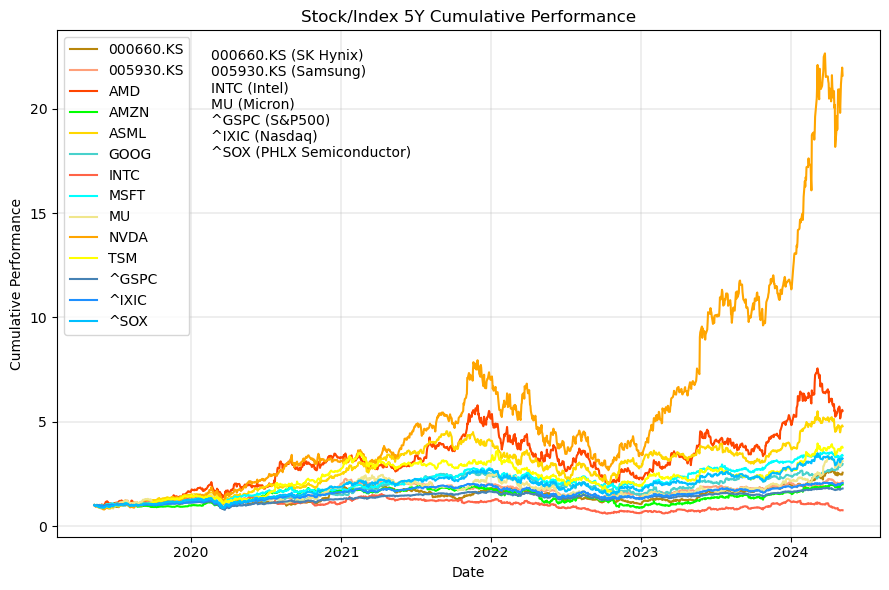

In [9]:
# Create a figure
plt.figure(figsize=(9, 6))  

# Create list of colours
si_colours = ['darkgoldenrod', 'lightsalmon', 'orangered', 'lime', 
              'gold', 'mediumturquoise', 'tomato', 'aqua',
              'khaki', 'orange', 'yellow', 'steelblue',
              'dodgerblue', 'deepskyblue']

# Create the line plot
for i, column in enumerate(ccolumn_index):
    sns.lineplot(x=price_df['Date'], y=price_df.iloc[:,column], label=price_df.columns[column][:-3], color=si_colours[i])

# Set plot features
plt.xlabel('Date')
plt.ylabel('Cumulative Performance')
plt.title('Stock/Index 5Y Cumulative Performance')
plt.legend()  
plt.grid(linewidth=0.3) 

# Create key for stock/index symbols
comp_key = '000660.KS (SK Hynix)\n005930.KS (Samsung)\nINTC (Intel)\nMU (Micron)\n'
index_key = '^GSPC (S&P500)\n^IXIC (Nasdaq)\n^SOX (PHLX Semiconductor)'
joint_key = comp_key + index_key
plt.text(price_df['Date'].iloc[200], 17.7, joint_key, fontsize=10, color='black')

plt.tight_layout() 
plt.show()

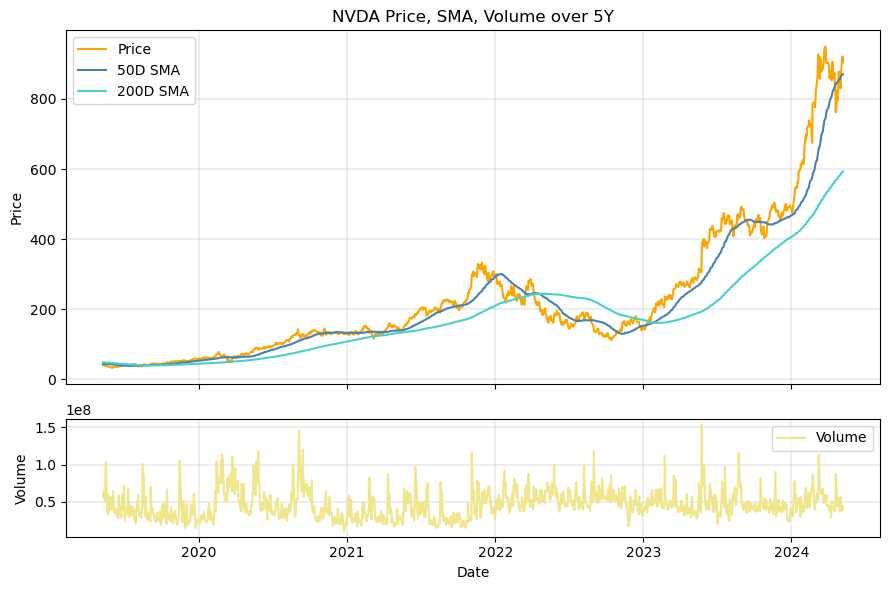

In [10]:
# Create figure and axes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9, 6), gridspec_kw={'height_ratios': [3, 1]})

# Plot top axes
sns.lineplot(data=df, x='Date', y='NVDA', label='Price', color='orange', ax=axs[0])
sns.lineplot(data=df, x='Date', y='50D SMA', label='50D SMA', color='steelblue', ax=axs[0])
sns.lineplot(data=df, x='Date', y='200D SMA', label='200D SMA', color='mediumturquoise', ax=axs[0])
axs[0].set_title('NVDA Price, SMA, Volume over 5Y')
axs[0].set_xlabel(None)
axs[0].set_ylabel('Price')
axs[0].set_xticklabels([])
axs[0].grid(linewidth=0.3)

# Plot bottom axes
sns.lineplot(data=df, x='Date', y='Volume', label='Volume', color ='khaki', ax=axs[1])  
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Volume')
axs[1].grid(linewidth=0.3)

plt.tight_layout()
plt.show()

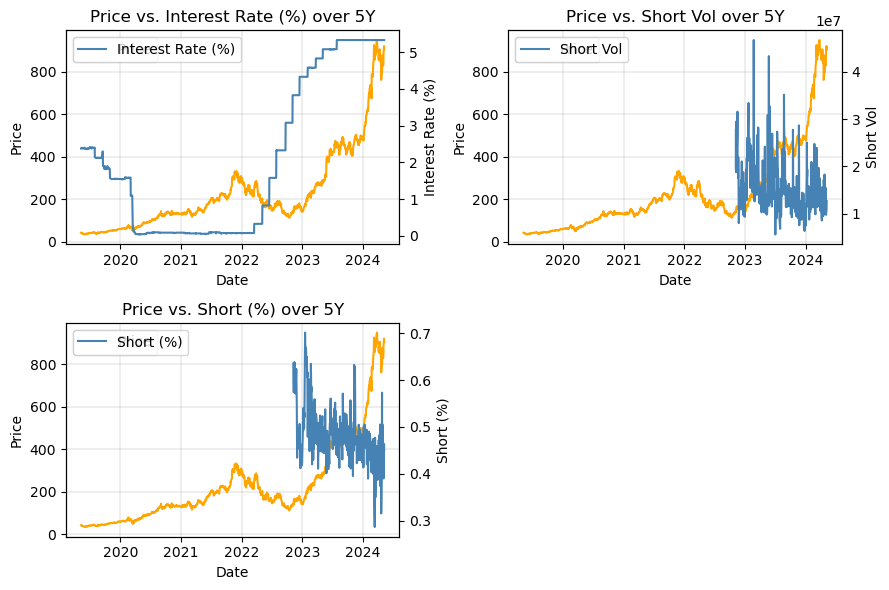

In [11]:
# Create list of columns indexes for plot
cpcolumn_index = [37, 33, 34]

# Create list of titles 
cp_titles = ['Price vs. Interest Rate (%) over 5Y', 
             'Price vs. Short Vol over 5Y', 
             'Price vs. Short (%) over 5Y']

# Create list of y-axis labels
cp_labels = ['Interest Rate (%)',
           'Short Vol',
           'Short (%)']

# Create figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9,6))

# Create the line plot
for i, column in enumerate(cpcolumn_index):
    # Create the first axis
    ax1 = axs.flat[i]
    sns.lineplot(data=df, x='Date', y='NVDA', label='Price', color='orange', ax=ax1)
    ax1.set_title(cp_titles[i])
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax1.grid(linewidth=0.3)
  
    # Create the second axis for other variable
    ax2 = ax1.twinx()
    sns.lineplot(data=df, x='Date', y=df.iloc[:, column], label=cp_labels[i], ax=ax2, color='steelblue')
    ax2.set_ylabel(cp_labels[i])
    
# Hide the 4th subplot
axs.flat[-1].axis('off')

plt.tight_layout() 
plt.show()

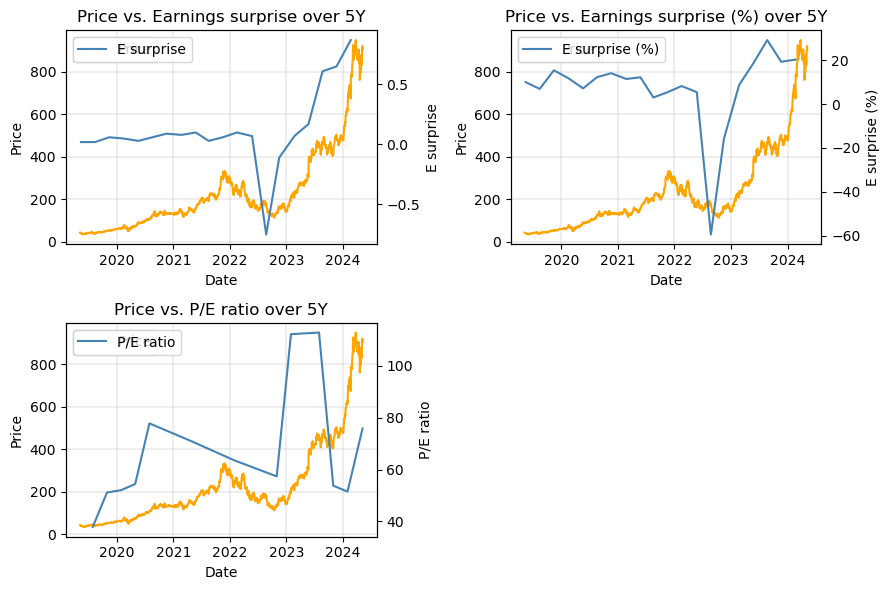

In [12]:
# Create list of columns indexes related to quarterly values
qcolumn_index = [31, 32, 35]

# Create list of titles 
q_titles = ['Price vs. Earnings surprise over 5Y', 
             'Price vs. Earnings surprise (%) over 5Y', 
             'Price vs. P/E ratio over 5Y']

# Create list of y-axis labels
q_labels = ['E surprise',
           'E surprise (%)',
           'P/E ratio']

# Create figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9,6))

# Create the line plot
for i, column in enumerate(qcolumn_index):
    # Create the first axis
    ax1 = axs.flat[i]
    sns.lineplot(data=df, x='Date', y='NVDA', label='Price', color='orange', ax=ax1)
    ax1.set_title(q_titles[i])
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax1.grid(linewidth=0.3)
  
    # Create the second axis for other variable
    ax2 = ax1.twinx()
    sns.lineplot(data=df, x='Date', y=df.iloc[:, column], label=q_labels[i], ax=ax2, color='steelblue')
    ax2.set_ylabel(q_labels[i])
    
# Hide the 4th subplot
axs.flat[-1].axis('off')

plt.tight_layout() 
plt.show()

<hr style="border:0.9px solid black;">

### NULLS

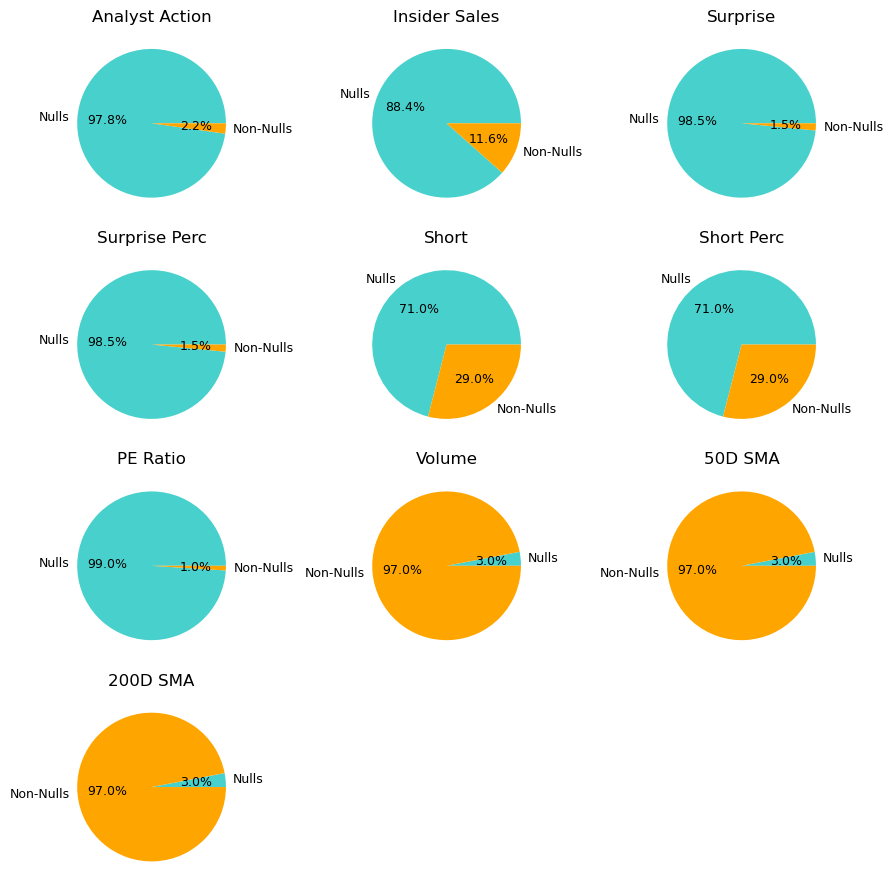

In [13]:
# Plot pie charts for variables with multiple nulls

# Create list of relevant column indexes 
ncolumn_index = [i for i in range(29,37)] + [38,39]

# Create a figure
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(9,9))

# Set the colour palette 
colors = ['mediumturquoise','orange']

# Loop through list and create pie charts on respective subplots
for i, column in enumerate(ncolumn_index):
    
    # Count the frequency of each category
    null_count = df.iloc[:,column].isnull().sum()
    non_null_count = df.iloc[:,column].notnull().sum()
    
    # Plot the pie chart
    axs.flat[i].pie([null_count, non_null_count], labels=['Nulls', 'Non-Nulls'], autopct='%1.1f%%', colors=colors, textprops={'fontsize': 9})
    
    # Set title
    axs.flat[i].set_title(df.columns[column])
    
# Hide the 11th and 12th subplot
axs.flat[-1].axis('off')
axs.flat[-2].axis('off')

plt.tight_layout()
plt.show()

### Observations
* **Analyst Action, Insider Sales, Surprise, Surprise Perc** - The nulls for these variables can be filled with 0 as they represent an absence of activity on those dates.  
* **Short, Short Perc, PE Ratio** - These variables possess a high proportion of nulls due to lack of data. They can be dropped.
* **Volume** - A small proportion of nulls. These can be filled with the median value. 
* **50D SMA and 200D SMA** - They have a minor proportion of nulls. These can be forward filled, applying the same method used to fill nulls for Price data.

<hr style="border:0.9px solid black;">

### DISTRIBUTION

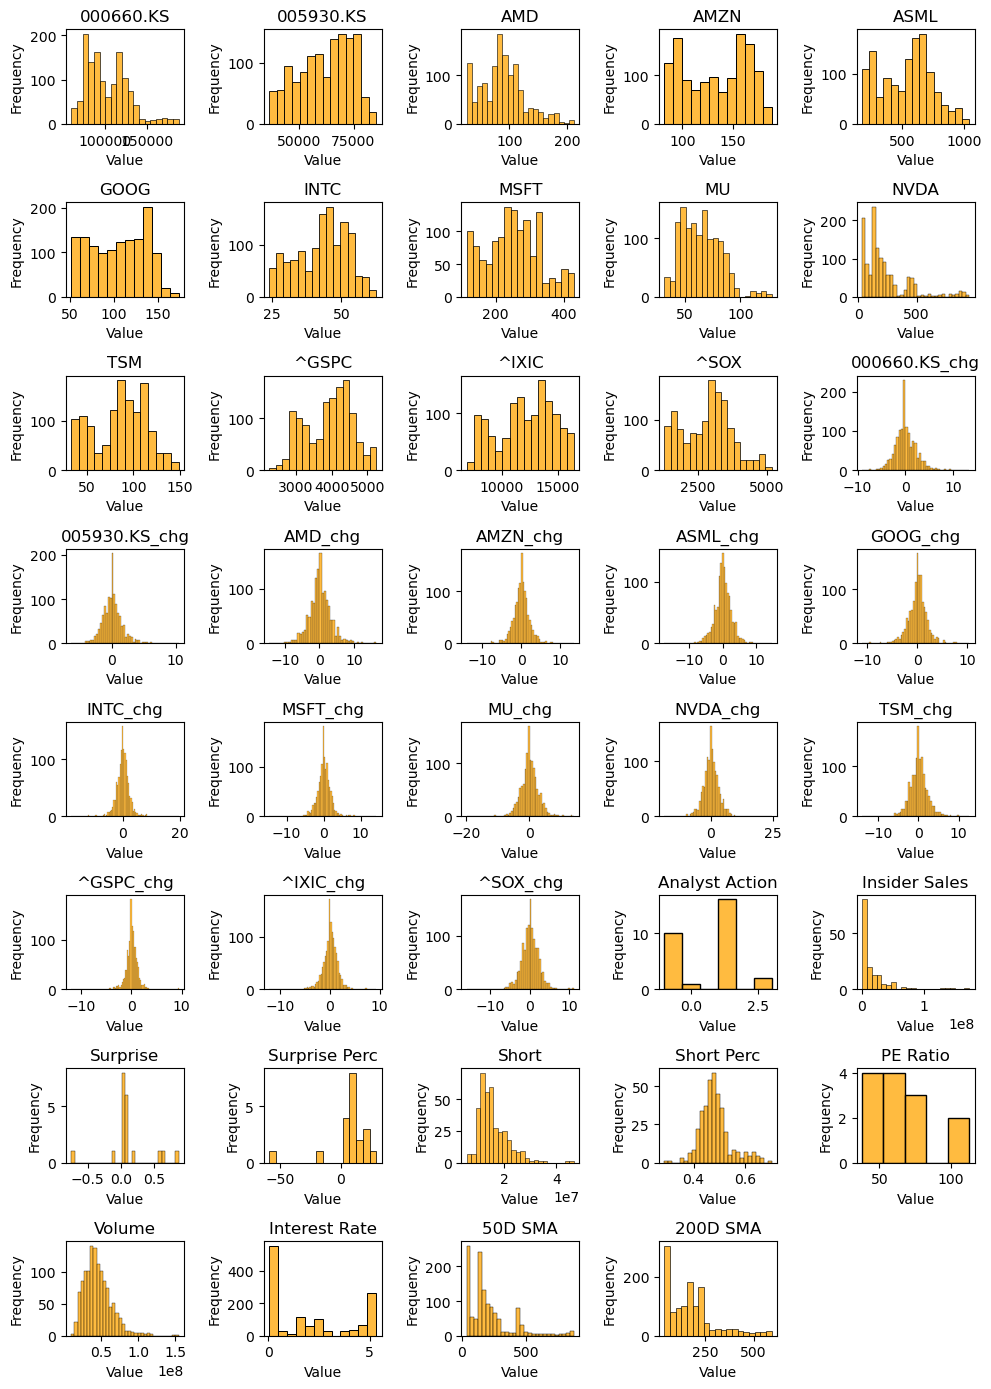

In [14]:
# Plot histograms - to observe distribution of data

# Create list of features
        features = list(df.select_dtypes(include='float64')) 

# Create a figure
fig, axs = plt.subplots(nrows=8, ncols=5, figsize=(10,14))

# Loop through features and create histograms on respective subplots
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, ax=axs.flat[i], color='orange')  
    axs.flat[i].set_title(feature)
    axs.flat[i].set_xlabel('Value')
    axs.flat[i].set_ylabel('Frequency')
    
# Hide the 40th subplot
axs.flat[-1].axis('off')

plt.tight_layout()
plt.show()

### Observations
* **Price** - Binomial distribution with values spread across the range. Interestingly, NVDA's price data stands out (with a positive skew), highlighting higher prices occurred less frequently throughout the 5Y period.
* **Price change** - Normal distribution with values clustered around the mean. The price change data of NVDA, INTC (Intel), and MU (Micron) stand out here with the range extending to +/-20 to 25 (vs. +/-10), highlighting that the prices of these two stocks have been more volatile compared to the others/market.
* **Analyst Action** - Bernoulli distribution as can be expected with upgrades being +1 and downgrades being -1 and multiple analyst actions in a day being rare.
* **Insider Sales** - Positively skewed distribution, with higher stock sales being less frequent.
* **Surprise and Surprise Perc** - Normal distribution for the former and negatively skewed distribution for the latter. Surprise is the difference between actual earnings and consensus earnings while Surprise Perc is calculated with consensus earnings as the denominator. One would expect investors to be more concerned with the latter rather than the former.
* **Short and Short Perc** - Positively skewed distribution for the former and normal distribution for the latter. Similar to Surprise, one would expect inviestors to be more concerned with the latter rather than the former.
* **PE Ratio** - Close to a uniform distribution, with a significant proportion of data points over the value of 50.
* **Volume** - Positively skewed distribution, highlighting high trading volumes occurred less frequently, which is not surprising. It has the same profile as Short (volume).
* **Interest Rate** - Positively skewed distribution with the majority of data points clustered at the low end and a small peak at the high end. 
* **50D and 200D SMA** - Positively skewed distributions, matching up with the profile of NVDA's Price.
* **Scale** - Even though Surprise Perc and Short Perc are both percentages, they are on different scales and data preprocessing needs to take this into account.
* **Range** - More broadly, the range of variables vary widely and data preprocessing needs to take this into account via scaling or normalisation.

<hr style="border:0.9px solid black;">

### OUTLIERS

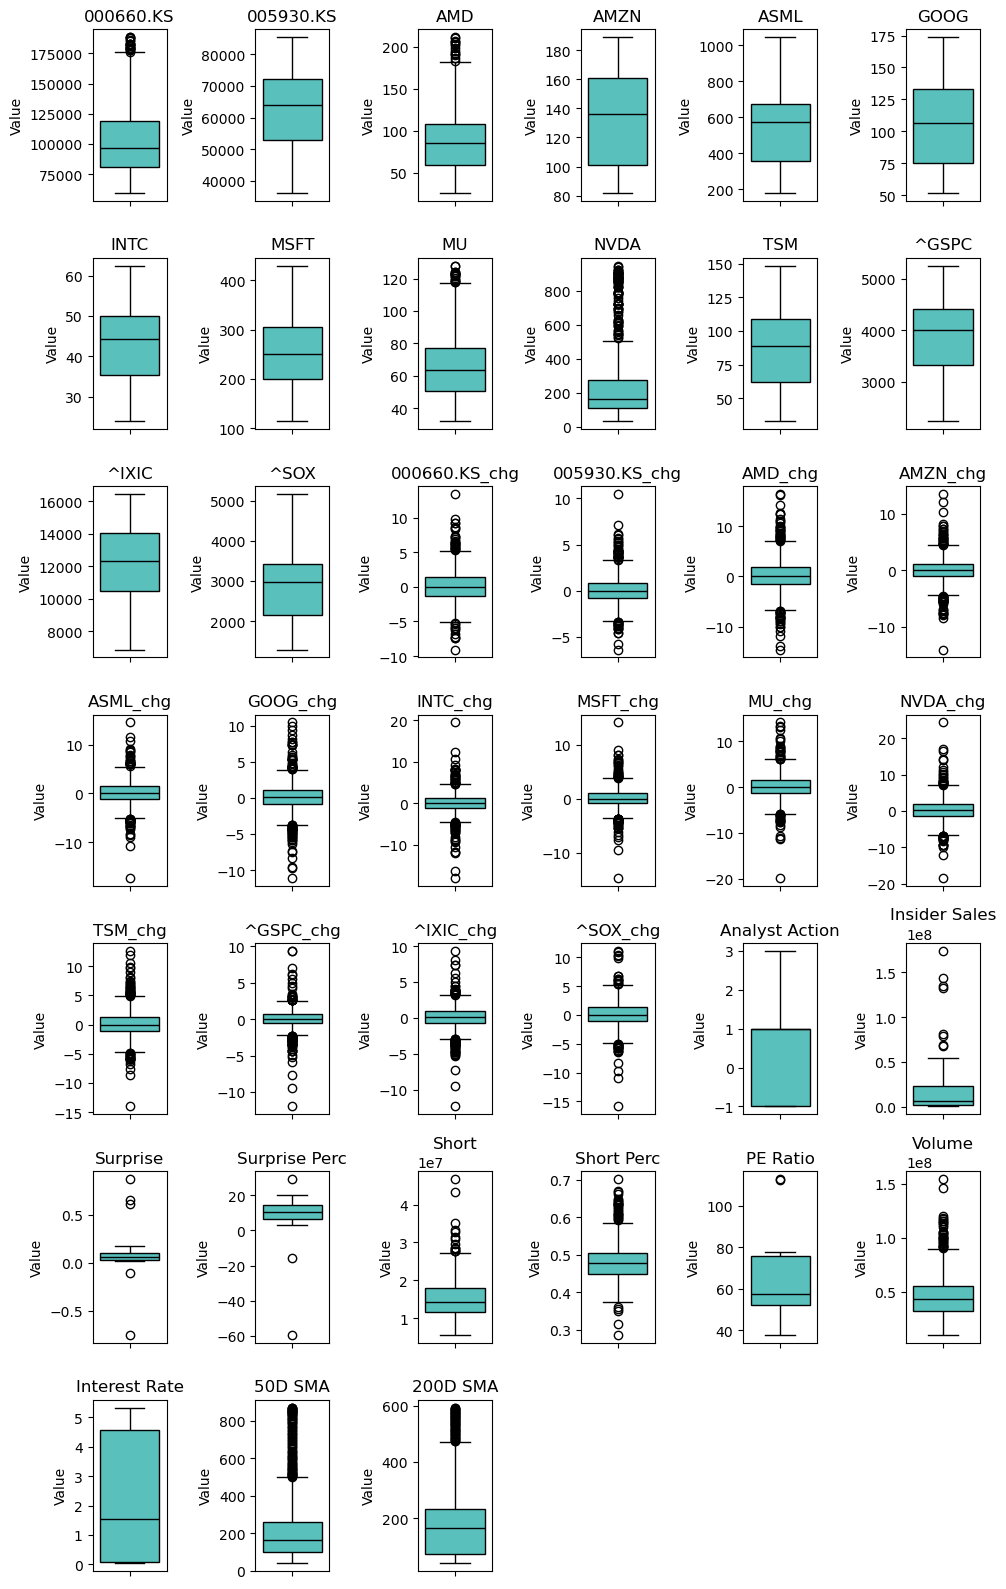

In [15]:
# Plot boxplots - to observe outliers

# Create a figure
fig, axs = plt.subplots(nrows=7, ncols=6, figsize=(10,16))

# Loop through features and create histograms on respective subplots
for i, feature in enumerate(features):
    sns.boxplot(data=df, y=feature, ax=axs.flat[i], color='mediumturquoise', linecolor='black')  
    axs.flat[i].set_title(feature)
    axs.flat[i].set_ylabel('Value')
    
# Hide the 40th subplot
axs.flat[-1].axis('off')
axs.flat[-2].axis('off')
axs.flat[-3].axis('off')

plt.tight_layout()
plt.show()

### Observations
* **Price data with outliers** - 000660.KS (SK Hynix), AMD, MU (Micron), and NVDA, with the latter having a significant number of outliers above the maximum value (excluding outliers).
* **Price change data with outliers** - All stocks and indices. Outliers on both sides (minimum/maximum excluding outliers), unlike in the case of Price data (on one side - above maximum).
* **Variables with a handful of outliers** - Insider Sales, Surprise, Surprise Perc, and P/E ratio.
* **Variables with several outliers** - Short, Short Perc, Volume, 50D SMA, and 200D SMA. The first two will be dropped anyway on the basis of significant nulls.
* **Outliers** - Data preprocessing needs to take these into account. 

<hr style="border:0.9px solid black;">

### CORRELATION

In [16]:
# Create list of coloumns to drop
columns_drop = ['Short', 'Short Perc', 'PE Ratio']

# Create list of columns to fill nulls
columns_fill = ['Analyst Action', 'Insider Sales', 'Surprise', 'Surprise Perc']

# Drop columns
df = df.drop(columns_drop, axis=1)

# Fill nulls with 0 for appropriate columns
df[columns_fill] = df[columns_fill].fillna(0)

# Forward fill nulls for SMAs
df[['50D SMA', '200D SMA']] = df[['50D SMA', '200D SMA']].ffill(axis=0)

# Fill nulls with median for Volume
vol_median = df['Volume'].median()
df['Volume'] = df['Volume'].fillna(vol_median)

# Print check
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1295
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1296 non-null   datetime64[ns]
 1   000660.KS       1296 non-null   float64       
 2   005930.KS       1296 non-null   float64       
 3   AMD             1296 non-null   float64       
 4   AMZN            1296 non-null   float64       
 5   ASML            1296 non-null   float64       
 6   GOOG            1296 non-null   float64       
 7   INTC            1296 non-null   float64       
 8   MSFT            1296 non-null   float64       
 9   MU              1296 non-null   float64       
 10  NVDA            1296 non-null   float64       
 11  TSM             1296 non-null   float64       
 12  ^GSPC           1296 non-null   float64       
 13  ^IXIC           1296 non-null   float64       
 14  ^SOX            1296 non-null   float64       
 15  000660.KS

In [17]:
# Fill residual nulls with 0 for price change columns 
df = df.fillna(0)

# Print to check 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1295
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1296 non-null   datetime64[ns]
 1   000660.KS       1296 non-null   float64       
 2   005930.KS       1296 non-null   float64       
 3   AMD             1296 non-null   float64       
 4   AMZN            1296 non-null   float64       
 5   ASML            1296 non-null   float64       
 6   GOOG            1296 non-null   float64       
 7   INTC            1296 non-null   float64       
 8   MSFT            1296 non-null   float64       
 9   MU              1296 non-null   float64       
 10  NVDA            1296 non-null   float64       
 11  TSM             1296 non-null   float64       
 12  ^GSPC           1296 non-null   float64       
 13  ^IXIC           1296 non-null   float64       
 14  ^SOX            1296 non-null   float64       
 15  000660.KS

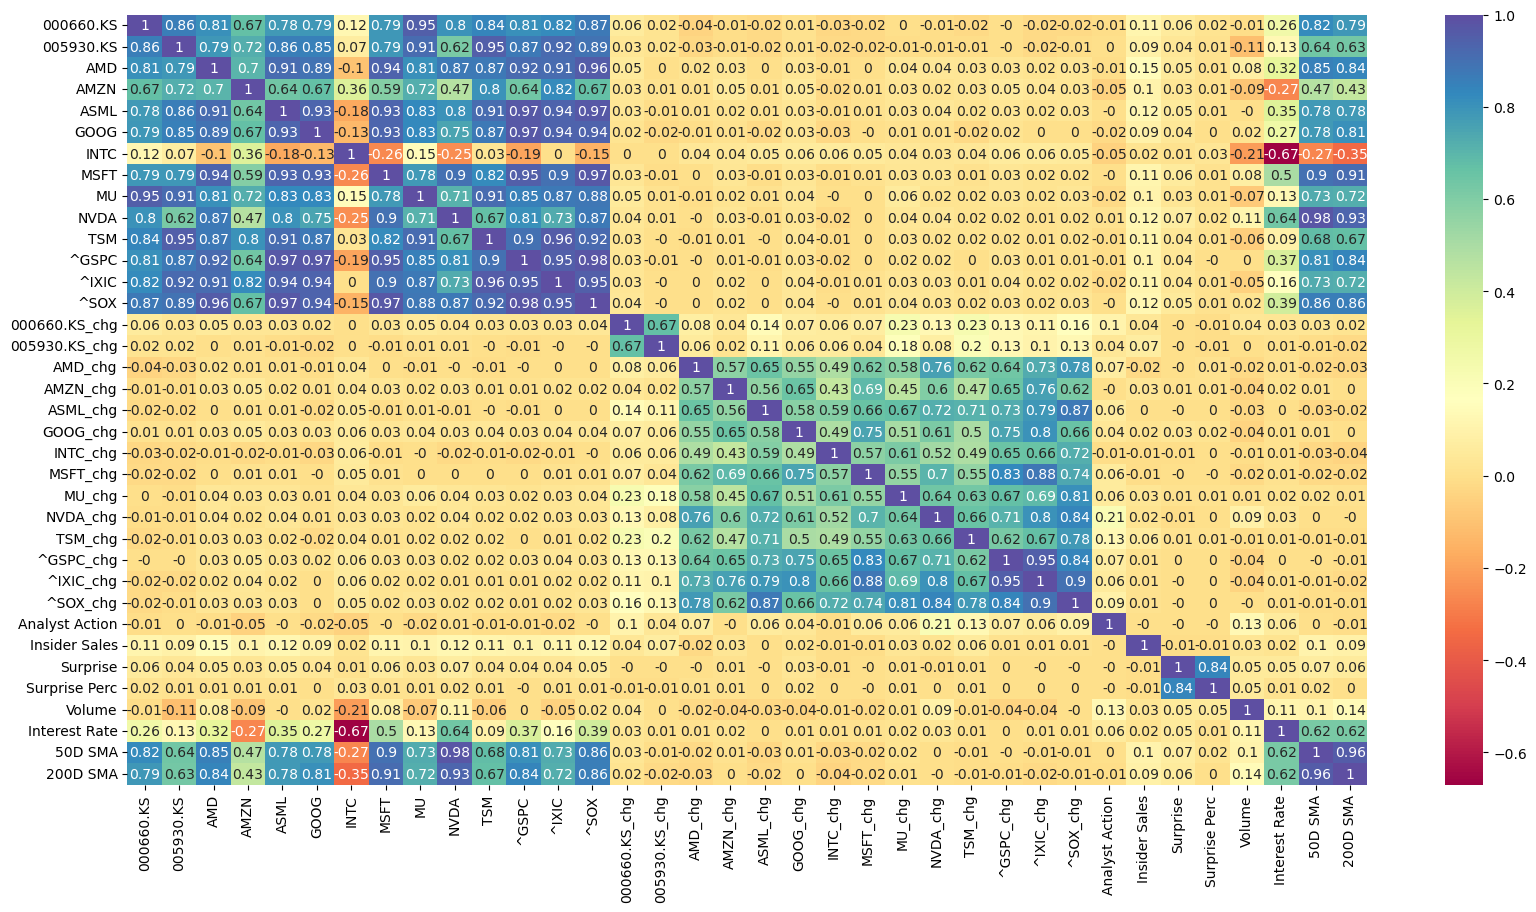

In [18]:
# Plot correlation matrix 

# Create a DataFrame to omit the Date column
corr_df = df.drop('Date', axis=1)

# Create a figure
plt.figure(figsize=(20,10))

# Plot matrix
sns.heatmap(corr_df.corr().round(2), annot=True, cmap='Spectral')
plt.show()

### Observations
* **NVDA Price as target variable**
    * High correlations with price of competitors, suppliers, customers, and market with the exception of Intel
        * If Price is the target, drop Intel in the interest of reducing model complexity
    * Surprisingly low correlations with price change of the same
        * If Price is the target, then drop price change features or test relationship with previous day price or price change as features
    * Low correlations with features one would expect to contribute to price - Analyst Action, Insider Sales, Surprise, Surprise Perc, Volume
        * If Price is the target, drop Analyst Action, Surprise, Surprise Perc as correlations close to 0
        * Keep Insider Sales and Volume that are just over 0.1
    * High correlation with Interest Rate so keep this feature
    * Unsurprising high correlation with 50D SMA and 200D SMA since they are derived from Price
* **NVDA Price change as target variable**
    * High correlations with price change of competitors, suppliers, customers and market with the exception of Korean companies (SK Hynix and Samsung) -- this is slightly different in the case of Price as described above
        * If Price change is the target, drop SK Hynix and Samsung
    * Surprisingly low correlations with price of the same
        * If Price change is the target, then drop price features or test relationship with previous day price change as a feature
    * Low correlations with remaining features one would expect to contribute to price change -- this is different in the case of Price as described above 
        * If Price change is the target, drop features with the exception of Analyst Action that is just over 0.2
* **Price vs. Price change**
    * Since Price has a relationship with more than just price variables, it would be more interesting to explore training a model with Price as the target as opposed to Price change
    * If the evaluation scores of this model are poor and time permits, training a model with Price change as the target can be explored
* **Price variables**
    * Highly correlated with each other, presenting the problem of multicollinearity

In [19]:
# Create list of columns to drop for scatter plots
column_names = [col for col in df.columns]
mcolumns_drop = column_names[15:29] + ['Date','INTC', 'Analyst Action', 'Surprise', 'Surprise Perc']

# Print to check
print(mcolumns_drop)

['000660.KS_chg', '005930.KS_chg', 'AMD_chg', 'AMZN_chg', 'ASML_chg', 'GOOG_chg', 'INTC_chg', 'MSFT_chg', 'MU_chg', 'NVDA_chg', 'TSM_chg', '^GSPC_chg', '^IXIC_chg', '^SOX_chg', 'Date', 'INTC', 'Analyst Action', 'Surprise', 'Surprise Perc']


In [20]:
# Drop columns
new_df = df.drop(mcolumns_drop, axis=1)

# Print to check
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   000660.KS      1296 non-null   float64
 1   005930.KS      1296 non-null   float64
 2   AMD            1296 non-null   float64
 3   AMZN           1296 non-null   float64
 4   ASML           1296 non-null   float64
 5   GOOG           1296 non-null   float64
 6   MSFT           1296 non-null   float64
 7   MU             1296 non-null   float64
 8   NVDA           1296 non-null   float64
 9   TSM            1296 non-null   float64
 10  ^GSPC          1296 non-null   float64
 11  ^IXIC          1296 non-null   float64
 12  ^SOX           1296 non-null   float64
 13  Insider Sales  1296 non-null   float64
 14  Volume         1296 non-null   float64
 15  Interest Rate  1296 non-null   float64
 16  50D SMA        1296 non-null   float64
 17  200D SMA       1296 non-null   float64
dtypes: float64(18

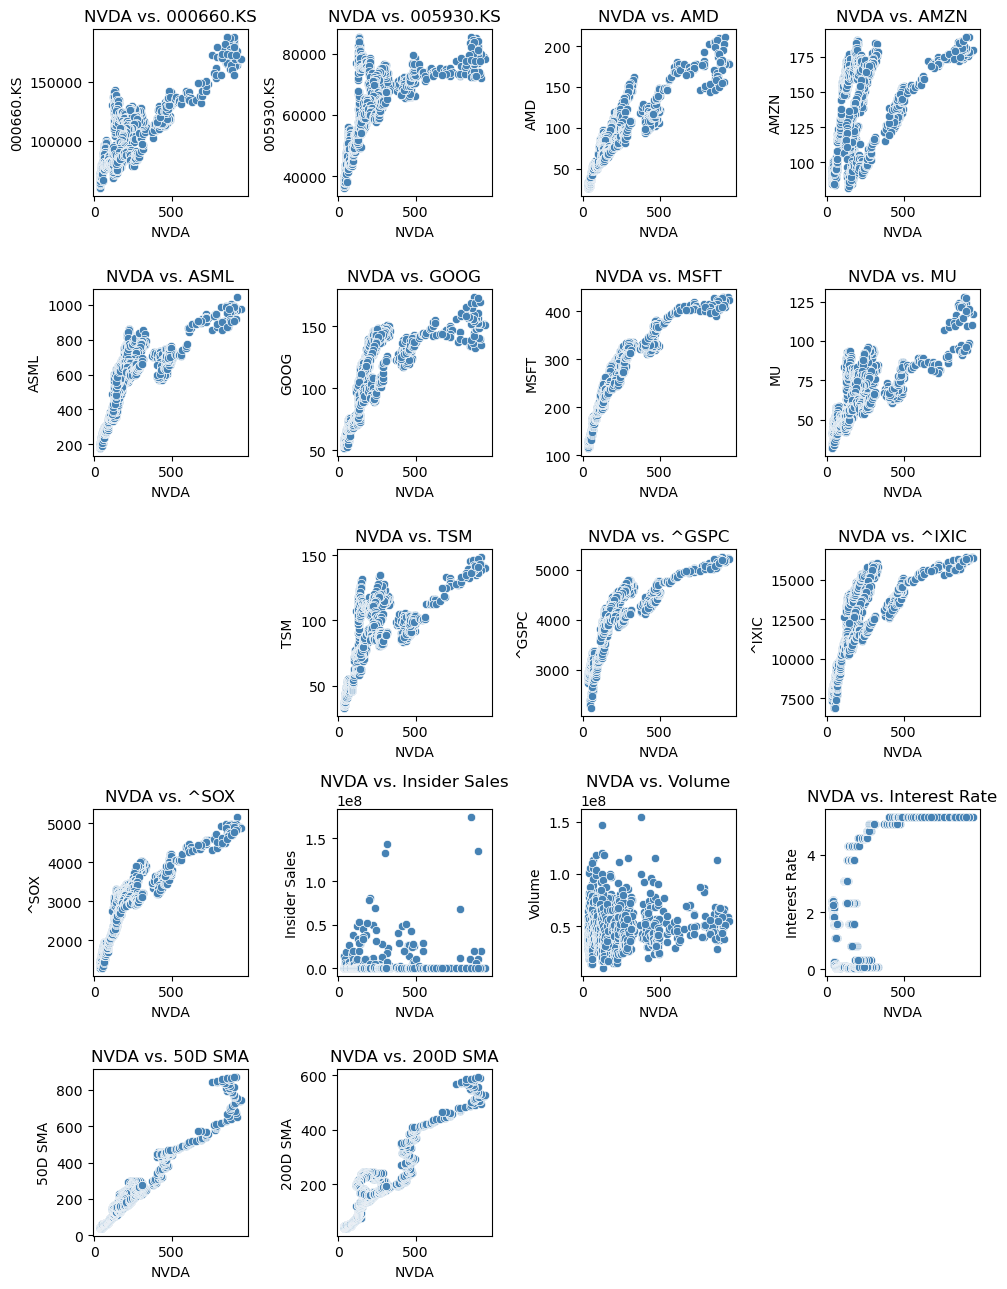

In [21]:
# Plot scatterplots - to observe relationships

# Create a figure
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(10,13))

# Loop through columns and create scatter plots on respective subplots
for i, column in enumerate(new_df.columns):
    if column != 'NVDA':
        sns.scatterplot(x=new_df['NVDA'], y=new_df[column], color='steelblue', ax=axs.flat[i])  
        axs.flat[i].set_title(f'NVDA vs. {column}')
        axs.flat[i].set_ylabel(column)
    else:
        axs.flat[i].axis('off')
    
# Hide the 19th and 20th subplot
axs.flat[-1].axis('off')
axs.flat[-2].axis('off')

plt.tight_layout()
plt.show()

### Observations
* **The scatterplots confirm earlier findings:**
    * Strong relationship between NVDA's price and other prices and SMAs
    * Weak relationship between NVDA's price and Insider Sales and Volume
        * Insider Sales - low occurrence of insider sales, sales taking place across range of NVDA's price
        * Volume - trading volume fits within a band that spans across range of NVDA's price
    * Strong relationship between NVDA's price and Interest Rate
        * Clusters at high and low ends of NVDA's price / Interest Rate 
* The reiteration of the weak relationship with Insider Sales and Volume suggests that they should be dropped

<hr style="border:0.9px solid black;">

### CORRELATION - PREVIOUS DAY

In [22]:
# Check latest df
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1295
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1296 non-null   datetime64[ns]
 1   000660.KS       1296 non-null   float64       
 2   005930.KS       1296 non-null   float64       
 3   AMD             1296 non-null   float64       
 4   AMZN            1296 non-null   float64       
 5   ASML            1296 non-null   float64       
 6   GOOG            1296 non-null   float64       
 7   INTC            1296 non-null   float64       
 8   MSFT            1296 non-null   float64       
 9   MU              1296 non-null   float64       
 10  NVDA            1296 non-null   float64       
 11  TSM             1296 non-null   float64       
 12  ^GSPC           1296 non-null   float64       
 13  ^IXIC           1296 non-null   float64       
 14  ^SOX            1296 non-null   float64       
 15  000660.KS

In [23]:
# Create list of columns to drop for new correlation matrix
ncolumn_names = [col for col in df.columns]
ncolumn_drop = ncolumn_names[29:34]

# Drop columns
test_df = df.drop(ncolumn_drop, axis=1)

# Print to check
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1295
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1296 non-null   datetime64[ns]
 1   000660.KS      1296 non-null   float64       
 2   005930.KS      1296 non-null   float64       
 3   AMD            1296 non-null   float64       
 4   AMZN           1296 non-null   float64       
 5   ASML           1296 non-null   float64       
 6   GOOG           1296 non-null   float64       
 7   INTC           1296 non-null   float64       
 8   MSFT           1296 non-null   float64       
 9   MU             1296 non-null   float64       
 10  NVDA           1296 non-null   float64       
 11  TSM            1296 non-null   float64       
 12  ^GSPC          1296 non-null   float64       
 13  ^IXIC          1296 non-null   float64       
 14  ^SOX           1296 non-null   float64       
 15  000660.KS_chg  1296 non-nu

In [24]:
# Create columns for previous day
pvd_names = ncolumn_names[1:29] + ncolumn_names[34:37]
for i, column in enumerate(pvd_names):
    test_df[f'{column}_pvd'] = test_df[column].shift(1)

# Print to check
print(test_df.info())
display(test_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1295
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1296 non-null   datetime64[ns]
 1   000660.KS          1296 non-null   float64       
 2   005930.KS          1296 non-null   float64       
 3   AMD                1296 non-null   float64       
 4   AMZN               1296 non-null   float64       
 5   ASML               1296 non-null   float64       
 6   GOOG               1296 non-null   float64       
 7   INTC               1296 non-null   float64       
 8   MSFT               1296 non-null   float64       
 9   MU                 1296 non-null   float64       
 10  NVDA               1296 non-null   float64       
 11  TSM                1296 non-null   float64       
 12  ^GSPC              1296 non-null   float64       
 13  ^IXIC              1296 non-null   float64       
 14  ^SOX         

,Date,000660.KS,005930.KS,AMD,AMZN,ASML,GOOG,INTC,MSFT,MU,...,MSFT_chg_pvd,MU_chg_pvd,NVDA_chg_pvd,TSM_chg_pvd,^GSPC_chg_pvd,^IXIC_chg_pvd,^SOX_chg_pvd,Interest Rate_pvd,50D SMA_pvd,200D SMA_pvd
0,2019-05-10,70162.523438,37687.656250,27.959999,94.499001,189.950531,58.213501,40.513161,121.014084,38.244068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05-13,69313.796875,37468.031250,26.240000,91.134003,182.017609,56.601501,39.250404,117.415924,36.711952,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.38,43.9478,48.7636
2,2019-05-14,70351.148438,37468.031250,27.320000,92.005997,189.281448,56.021999,39.609940,118.729538,37.821766,...,-2.973340,-4.006153,-6.142657,-4.296071,-2.413056,-3.409397,-4.727937,2.38,43.9837,48.6581
3,2019-05-15,70256.835938,37380.187500,27.580000,93.557503,191.756927,58.210499,40.004547,120.401520,37.723545,...,1.118770,3.023031,2.265696,2.390822,0.801594,1.143847,2.404628,2.38,43.9939,48.5460
4,2019-05-16,67804.921875,36501.683594,28.010000,95.378502,193.200150,58.949001,39.925625,123.181755,36.643200,...,1.408227,-0.259694,-1.518138,0.000000,0.583898,1.133361,0.808830,2.40,44.0120,48.4270


In [25]:
# Drop first few rows
test_df = test_df.iloc[2:,:]

# Print to check 
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1294 entries, 2 to 1295
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1294 non-null   datetime64[ns]
 1   000660.KS          1294 non-null   float64       
 2   005930.KS          1294 non-null   float64       
 3   AMD                1294 non-null   float64       
 4   AMZN               1294 non-null   float64       
 5   ASML               1294 non-null   float64       
 6   GOOG               1294 non-null   float64       
 7   INTC               1294 non-null   float64       
 8   MSFT               1294 non-null   float64       
 9   MU                 1294 non-null   float64       
 10  NVDA               1294 non-null   float64       
 11  TSM                1294 non-null   float64       
 12  ^GSPC              1294 non-null   float64       
 13  ^IXIC              1294 non-null   float64       
 14  ^SOX         

In [26]:
# Drop columns for new correlation matrix
newcorr_drop = ncolumn_names[0:10] + ncolumn_names[11:29] + ncolumn_names[34:37]
testcorr_df = test_df.drop(newcorr_drop, axis=1)

# Print to check
print(testcorr_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1294 entries, 2 to 1295
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NVDA               1294 non-null   float64
 1   000660.KS_pvd      1294 non-null   float64
 2   005930.KS_pvd      1294 non-null   float64
 3   AMD_pvd            1294 non-null   float64
 4   AMZN_pvd           1294 non-null   float64
 5   ASML_pvd           1294 non-null   float64
 6   GOOG_pvd           1294 non-null   float64
 7   INTC_pvd           1294 non-null   float64
 8   MSFT_pvd           1294 non-null   float64
 9   MU_pvd             1294 non-null   float64
 10  NVDA_pvd           1294 non-null   float64
 11  TSM_pvd            1294 non-null   float64
 12  ^GSPC_pvd          1294 non-null   float64
 13  ^IXIC_pvd          1294 non-null   float64
 14  ^SOX_pvd           1294 non-null   float64
 15  000660.KS_chg_pvd  1294 non-null   float64
 16  005930.KS_chg_pvd  1294 non-n

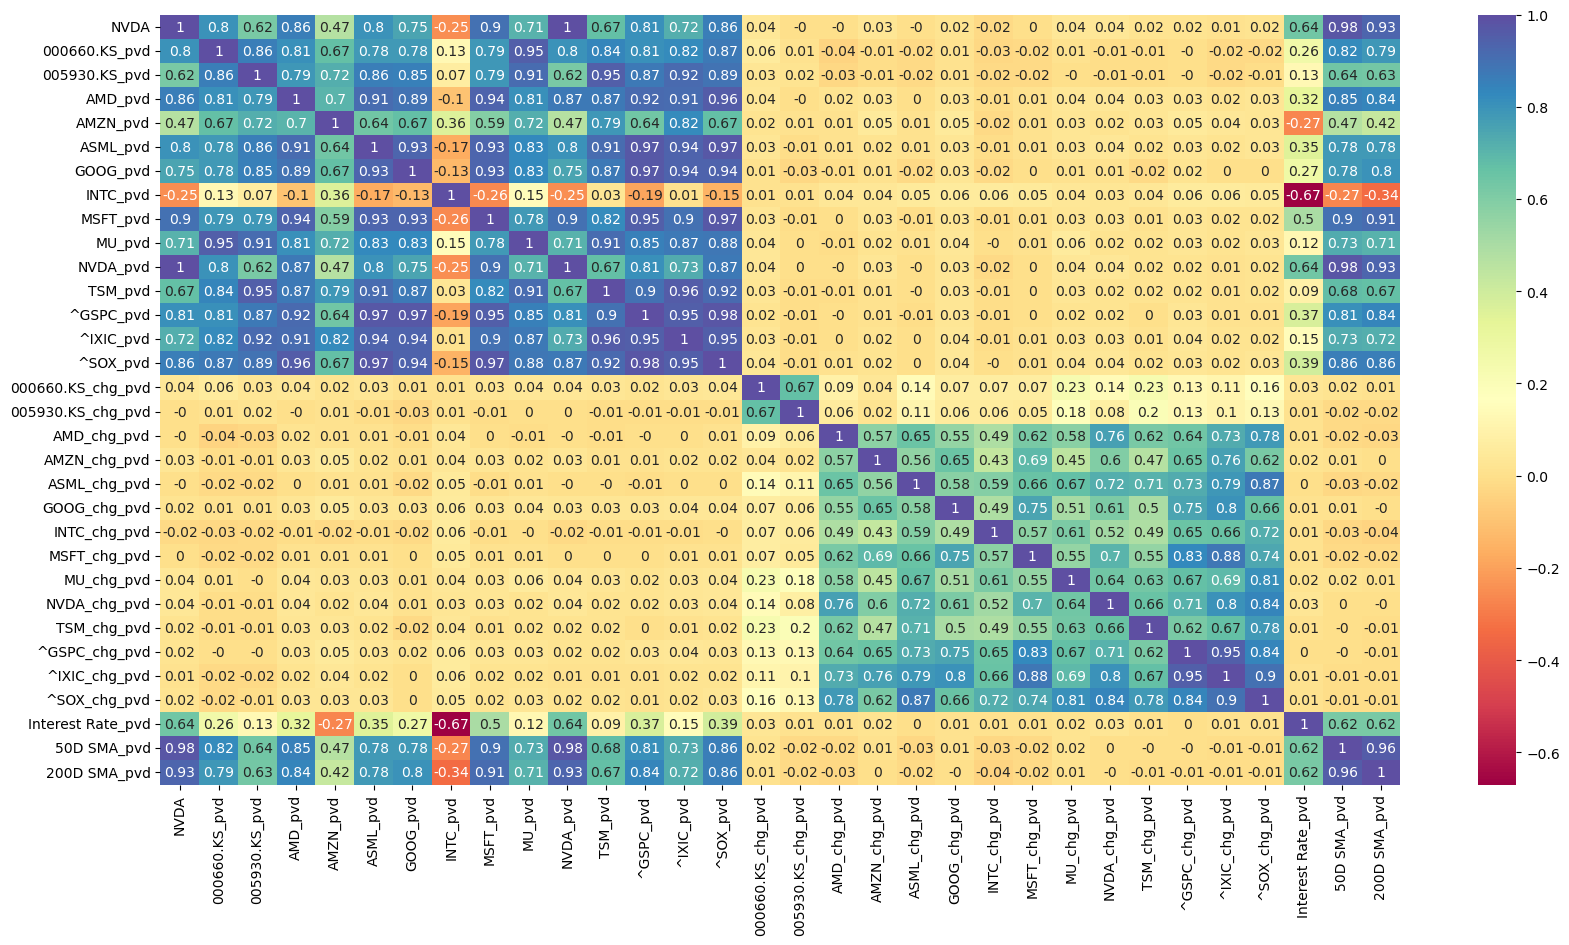

In [27]:
# Plot correlation matrix 

# Create a figure
plt.figure(figsize=(20,10))

# Plot matrix
sns.heatmap(testcorr_df.corr().round(2), annot=True, cmap='Spectral')
plt.show()

### Observations
* Correlations hold using previous day values of features
* For model training, use previous day values instead of current day values since we want to predict future price